In [148]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import json

In [27]:
counties_raw = pd.read_table('../inputData/national_counties.txt',header=None)
counties_raw.rename(columns={0:'State, County'})
tmp0 = []
tmp1 = []
for i in range(0,len(counties_raw)):
    tmp0.append(counties_raw.iloc[i,0][10:-3])
    tmp1.append(counties_raw.iloc[i,0][:2])
counties = pd.DataFrame.from_dict(tmp0)
states = pd.DataFrame.from_dict(tmp1)

counties.rename(columns={0:'County'})
states.rename(columns={0:'State'})

counties = counties[states!='AS'].dropna()
counties = counties[states!='AK'].dropna()
counties = counties[states!='GU'].dropna()
counties = counties[states!='MP'].dropna()
counties = counties[states!='PR'].dropna()
counties = counties[states!='VI'].dropna()
counties = counties[states!='UM'].dropna()
counties = counties.reset_index()

#Baltimore needs city --> county:
counties[0][1187] = counties[0][1187].replace('city','County')
counties[0][1568] = counties[0][1568].replace(' city','')
#Charlotsville city needs --> Charlostville
counties[0][2890] = counties[0][2890].replace(' city','')
counties[0][2896] = counties[0][2896].replace('city','County')
counties[0][2902] = counties[0][2902].replace(' city','')
counties[0][2905] = counties[0][2905].replace(' city','')
counties[0][2906] = counties[0][2906].replace(' city','')
counties[0][2914] = counties[0][2914].replace(' city','')
counties[0][2917] = counties[0][2917].replace(' city','')
counties[0][2920] = counties[0][2920].replace(' city','')
counties[0][2921] = counties[0][2921].replace(' city','')
counties[0][2922] = counties[0][2922].replace(' city','')
counties[0][2923] = counties[0][2923].replace('city','County')



#MISSING BEAUFORT COUNTY, NC
#MISSING ACCOMACK COUNTY, VA
#INCOMPLETE BEAUFORT COUNTY, SC


states = states[states!='AS'].dropna()
states = states[states!='AK'].dropna()
states = states[states!='GU'].dropna()
states = states[states!='MP'].dropna()
states = states[states!='PR'].dropna()
states = states[states!='VI'].dropna()
states = states[states!='UM'].dropna()
states = states.reset_index()

#Hennepin County needs MN --> Minnesota:
states[0][1311] = states[0][1311].replace('MN','Minnesota')


counties
#states

/anaconda3/envs/osm/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/osm/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/osm/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/osm/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy

,index,0
0,0,Autauga County
1,1,Baldwin County
2,2,Barbour County
3,3,Bibb County
4,4,Blount County
5,5,Bullock County
6,6,Butler County
7,7,Calhoun County
8,8,Chambers County
9,9,Cherokee County


In [222]:
for i in range(0, len(counties)):
    # name of county:
    place_name = counties[0][i] + ', ' + states[0][i]
    # get county boundary polygon
    boundary = ox.osm_polygon_download(place_name)[0]
    path = '../boundary_data/'+ states[0][i]+'_'+counties[0][i] +'.json'
    path = path.replace(' ','')
    with open(path, 'w') as outfile:
        json.dump(boundary, outfile, indent=1)
    print('Writing '+path+' ...')
    print((i+1)/len(counties)*100,'percent complete.')
    

Writing ../boundary_data/AL_AutaugaCounty.json ...
0.03211303789338471 percent complete.
Writing ../boundary_data/AL_BaldwinCounty.json ...
0.06422607578676942 percent complete.
Writing ../boundary_data/AL_BarbourCounty.json ...
0.09633911368015415 percent complete.
Writing ../boundary_data/AL_BibbCounty.json ...
0.12845215157353884 percent complete.
Writing ../boundary_data/AL_BlountCounty.json ...
0.16056518946692355 percent complete.
Writing ../boundary_data/AL_BullockCounty.json ...
0.1926782273603083 percent complete.
Writing ../boundary_data/AL_ButlerCounty.json ...
0.22479126525369297 percent complete.
Writing ../boundary_data/AL_CalhounCounty.json ...
0.2569043031470777 percent complete.
Writing ../boundary_data/AL_ChambersCounty.json ...
0.2890173410404624 percent complete.
Writing ../boundary_data/AL_CherokeeCounty.json ...
0.3211303789338471 percent complete.
Writing ../boundary_data/AL_ChiltonCounty.json ...
0.35324341682723187 percent complete.
Writing ../boundary_data/AL_

Writing ../boundary_data/AR_ClevelandCounty.json ...
3.050738599871548 percent complete.
Writing ../boundary_data/AR_ColumbiaCounty.json ...
3.0828516377649327 percent complete.
Writing ../boundary_data/AR_ConwayCounty.json ...
3.1149646756583174 percent complete.
Writing ../boundary_data/AR_CraigheadCounty.json ...
3.147077713551702 percent complete.
Writing ../boundary_data/AR_CrawfordCounty.json ...
3.1791907514450863 percent complete.
Writing ../boundary_data/AR_CrittendenCounty.json ...
3.211303789338472 percent complete.
Writing ../boundary_data/AR_CrossCounty.json ...
3.243416827231856 percent complete.
Writing ../boundary_data/AR_DallasCounty.json ...
3.275529865125241 percent complete.
Writing ../boundary_data/AR_DeshaCounty.json ...
3.307642903018625 percent complete.
Writing ../boundary_data/AR_DrewCounty.json ...
3.339755940912011 percent complete.
Writing ../boundary_data/AR_FaulknerCounty.json ...
3.371868978805395 percent complete.
Writing ../boundary_data/AR_FranklinCou

Writing ../boundary_data/CA_RiversideCounty.json ...
6.101477199743096 percent complete.
Writing ../boundary_data/CA_SacramentoCounty.json ...
6.13359023763648 percent complete.
Writing ../boundary_data/CA_SanBenitoCounty.json ...
6.165703275529865 percent complete.
Writing ../boundary_data/CA_SanBernardinoCounty.json ...
6.19781631342325 percent complete.
Writing ../boundary_data/CA_SanDiegoCounty.json ...
6.229929351316635 percent complete.
Writing ../boundary_data/CA_SanFranciscoCounty.json ...
6.262042389210019 percent complete.
Writing ../boundary_data/CA_SanJoaquinCounty.json ...
6.294155427103404 percent complete.
Writing ../boundary_data/CA_SanLuisObispoCounty.json ...
6.326268464996788 percent complete.
Writing ../boundary_data/CA_SanMateoCounty.json ...
6.358381502890173 percent complete.
Writing ../boundary_data/CA_SantaBarbaraCounty.json ...
6.390494540783558 percent complete.
Writing ../boundary_data/CA_SantaClaraCounty.json ...
6.422607578676944 percent complete.
Writing 

Writing ../boundary_data/CT_NewHavenCounty.json ...
9.12010276172126 percent complete.
Writing ../boundary_data/CT_NewLondonCounty.json ...
9.152215799614643 percent complete.
Writing ../boundary_data/CT_TollandCounty.json ...
9.184328837508028 percent complete.
Writing ../boundary_data/CT_WindhamCounty.json ...
9.216441875401413 percent complete.
Writing ../boundary_data/DE_KentCounty.json ...
9.248554913294797 percent complete.
Writing ../boundary_data/DE_NewCastleCounty.json ...
9.280667951188182 percent complete.
Writing ../boundary_data/DE_SussexCounty.json ...
9.312780989081567 percent complete.
Writing ../boundary_data/DC_DistrictofColumbia.json ...
9.344894026974952 percent complete.
Writing ../boundary_data/FL_AlachuaCounty.json ...
9.377007064868337 percent complete.
Writing ../boundary_data/FL_BakerCounty.json ...
9.40912010276172 percent complete.
Writing ../boundary_data/FL_BayCounty.json ...
9.441233140655106 percent complete.
Writing ../boundary_data/FL_BradfordCounty.js

Writing ../boundary_data/GA_CamdenCounty.json ...
12.138728323699421 percent complete.
Writing ../boundary_data/GA_CandlerCounty.json ...
12.170841361592807 percent complete.
Writing ../boundary_data/GA_CarrollCounty.json ...
12.202954399486192 percent complete.
Writing ../boundary_data/GA_CatoosaCounty.json ...
12.235067437379577 percent complete.
Writing ../boundary_data/GA_CharltonCounty.json ...
12.26718047527296 percent complete.
Writing ../boundary_data/GA_ChathamCounty.json ...
12.299293513166345 percent complete.
Writing ../boundary_data/GA_ChattahoocheeCounty.json ...
12.33140655105973 percent complete.
Writing ../boundary_data/GA_ChattoogaCounty.json ...
12.363519588953114 percent complete.
Writing ../boundary_data/GA_CherokeeCounty.json ...
12.3956326268465 percent complete.
Writing ../boundary_data/GA_ClarkeCounty.json ...
12.427745664739884 percent complete.
Writing ../boundary_data/GA_ClayCounty.json ...
12.45985870263327 percent complete.
Writing ../boundary_data/GA_Clay

ConnectionError: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?format=json&limit=1&dedupe=0&polygon_geojson=1&q=Pickens+County%2C+GA (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0xa29e01828>: Failed to establish a new connection: [Errno 60] Operation timed out'))

## Plot results:

In [212]:
json_data=open(path, 'r')
data = json.load(json_data)

In [213]:
type(data)
len(data)

13

In [209]:
data['geojson']

{'type': 'Polygon',
 'coordinates': [[[-86.92099, 32.656094],
   [-86.914963, 32.649281],
   [-86.918221, 32.646538],
   [-86.910515, 32.633358],
   [-86.912071, 32.617413],
   [-86.906563, 32.606045],
   [-86.903206, 32.587837],
   [-86.900963, 32.574181],
   [-86.899796, 32.559155],
   [-86.904114, 32.552307],
   [-86.905128, 32.538181],
   [-86.901306, 32.53455],
   [-86.902916, 32.529987],
   [-86.896912, 32.525455],
   [-86.893616, 32.518631],
   [-86.889771, 32.510445],
   [-86.890831, 32.504974],
   [-86.883728, 32.497253],
   [-86.880417, 32.487698],
   [-86.884201, 32.483131],
   [-86.880379, 32.479954],
   [-86.873817, 32.471321],
   [-86.870522, 32.463131],
   [-86.870514, 32.46085],
   [-86.867249, 32.459953],
   [-86.863976, 32.456776],
   [-86.861786, 32.45314],
   [-86.861221, 32.449493],
   [-86.866081, 32.4431],
   [-86.866608, 32.438545],
   [-86.860092, 32.439022],
   [-86.856293, 32.439487],
   [-86.84977, 32.438595],
   [-86.846497, 32.436329],
   [-86.841599, 32.4

In [168]:
type(data['geojson'])

dict

In [214]:
polygon = data['geojson']['coordinates']
polygon

[[[-86.92099, 32.656094],
  [-86.914963, 32.649281],
  [-86.918221, 32.646538],
  [-86.910515, 32.633358],
  [-86.912071, 32.617413],
  [-86.906563, 32.606045],
  [-86.903206, 32.587837],
  [-86.900963, 32.574181],
  [-86.899796, 32.559155],
  [-86.904114, 32.552307],
  [-86.905128, 32.538181],
  [-86.901306, 32.53455],
  [-86.902916, 32.529987],
  [-86.896912, 32.525455],
  [-86.893616, 32.518631],
  [-86.889771, 32.510445],
  [-86.890831, 32.504974],
  [-86.883728, 32.497253],
  [-86.880417, 32.487698],
  [-86.884201, 32.483131],
  [-86.880379, 32.479954],
  [-86.873817, 32.471321],
  [-86.870522, 32.463131],
  [-86.870514, 32.46085],
  [-86.867249, 32.459953],
  [-86.863976, 32.456776],
  [-86.861786, 32.45314],
  [-86.861221, 32.449493],
  [-86.866081, 32.4431],
  [-86.866608, 32.438545],
  [-86.860092, 32.439022],
  [-86.856293, 32.439487],
  [-86.84977, 32.438595],
  [-86.846497, 32.436329],
  [-86.841599, 32.432697],
  [-86.830719, 32.429543],
  [-86.827995, 32.427727],
  [-86.8

In [172]:
type(polygon)

list

In [215]:
polygon_ar = np.asarray(polygon)[0]
polygon_ar

array([[-86.92099  ,  32.656094 ],
       [-86.914963 ,  32.649281 ],
       [-86.918221 ,  32.646538 ],
       [-86.910515 ,  32.633358 ],
       [-86.912071 ,  32.617413 ],
       [-86.906563 ,  32.606045 ],
       [-86.903206 ,  32.587837 ],
       [-86.900963 ,  32.574181 ],
       [-86.899796 ,  32.559155 ],
       [-86.904114 ,  32.552307 ],
       [-86.905128 ,  32.538181 ],
       [-86.901306 ,  32.53455  ],
       [-86.902916 ,  32.529987 ],
       [-86.896912 ,  32.525455 ],
       [-86.893616 ,  32.518631 ],
       [-86.889771 ,  32.510445 ],
       [-86.890831 ,  32.504974 ],
       [-86.883728 ,  32.497253 ],
       [-86.880417 ,  32.487698 ],
       [-86.884201 ,  32.483131 ],
       [-86.880379 ,  32.479954 ],
       [-86.873817 ,  32.471321 ],
       [-86.870522 ,  32.463131 ],
       [-86.870514 ,  32.46085  ],
       [-86.867249 ,  32.459953 ],
       [-86.863976 ,  32.456776 ],
       [-86.861786 ,  32.45314  ],
       [-86.861221 ,  32.449493 ],
       [-86.866081 ,

In [181]:
polygon_ar.shape

(309, 2)

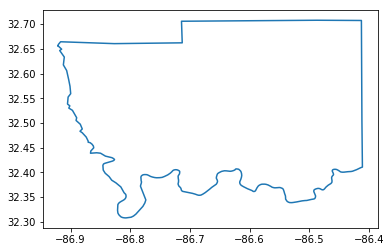

In [189]:
#plt.scatter(polygon_ar[:,0],polygon_ar[:,1], c = 'r', s = 100)
plt.plot(polygon_ar[:,0],polygon_ar[:,1])
plt.show()

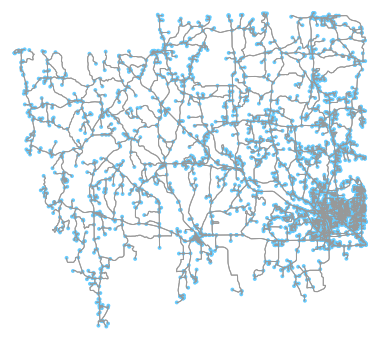

In [186]:
graph = ox.graph_from_place(place_name, network_type='drive')
fig, ax = ox.plot_graph(graph)

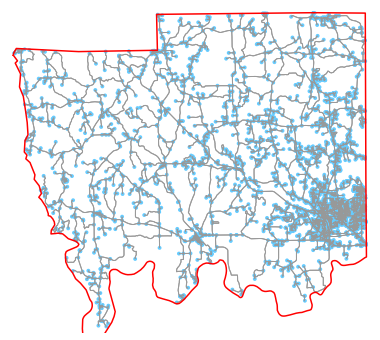

In [216]:
ox.plot_graph(graph, show=False, close=False)
plt.plot(polygon_ar[:,0],polygon_ar[:,1],'r')
plt.show()